# SEP 6DM3: Final Project

| Group    | Name           | Student Id  |
|----------|----------------|-------------|
| Group 10 | Karan Goswami  | 400551541   |
| Group 10 | Jainam Patel   | 400551530   |


## Install required libraries

`ucimlrepo` is not preinstalled in Colab environment. Apart from this, other libraries are already preinstalled.

In [ ]:
%pip install ucimlrepo==0.0.7 | tail -n 1

## Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import time
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
from ucimlrepo import fetch_ucirepo

## Fetching the dataset from `ucimlrepo`.

The dataset used in this project is [Census Income](https://archive.ics.uci.edu/dataset/2/adult) dataset.

In [ ]:
# Fetch dataset
adult = fetch_ucirepo(id=2)

# Concatenate along columns (axis=1) to get a single dataframe
df = pd.concat([adult.data.features, adult.data.targets], axis=1)

# Display the combined dataframe
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Dataset Description

Contains annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. Extraction was done by Barry Becker from the 1994 Census database.

| Variable Name   | Role    | Type        | Description                                                                                                                                                                                                                          |
|-----------------|---------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age             | Feature | Integer     | Age of the person.                                                                                                                                                                                                                   |
| workclass       | Feature | Categorical | Type of work classification (e.g., Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).                                                                                           |
| fnlwgt          | Feature | Integer     | Final weight assigned by the Census Bureau for survey sampling.                                                                                                                                                                     |
| education       | Feature | Categorical | Highest education level attained (e.g., Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).                           |
| education-num   | Feature | Integer     | Numeric representation of the highest education level attained.                                                                                                                                                                    |
| marital-status  | Feature | Categorical | Marital status (e.g., Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).                                                                                                    |
| occupation      | Feature | Categorical | Type of occupation (e.g., Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces). |
| relationship    | Feature | Categorical | Relationship status (e.g., Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).                                                                                                                                       |
| race            | Feature | Categorical | Race classification (e.g., White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).                                                                                                                                              |
| sex             | Feature | Binary      | Sex of the individual (Female, Male).                                                                                                                                                                                                |
| capital-gain    | Feature | Integer     | Capital gain recorded for the individual.                                                                                                                                                                                          |
| capital-loss    | Feature | Integer     | Capital loss recorded for the individual.                                                                                                                                                                                          |
| hours-per-week  | Feature | Integer     | Number of hours worked per week.                                                                                                                                                                                                    |
| native-country  | Feature | Categorical | Country of origin (e.g., United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US (Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, etc.). |
| income          | Target  | Binary      | Income level (>50K or <=50K).                                                                                                                                                                                                         |


Let's begin with investigating value counts from the columns. We do that using `value_counts()`. Keeping `dropna=False` keeps the `NaN` values while showing, if it's `True`, it will discard `NaN` values.

In [ ]:
for column in df.columns:
    print(f"\n{column} unique values:")
    print(df[column].value_counts(dropna=False))


age unique values:
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

workclass unique values:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
NaN                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

fnlwgt unique values:
fnlwgt
203488    21
120277    19
190290    19
126569    18
125892    18
          ..
275677     1
311631     1
374763     1
242136     1
26711      1
Name: count, Length: 28523, dtype: int64

education unique values:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12t

From above, we see that columns have `NaN`, `?` values. Even in the target column of `income`, we have an unnecessary `.` at the end of the category name causing it seem different (separate column).

## Data preprocessing

We will start with data preprocessing step. We will start that by finding all `NaN` values in the dataset.

In [ ]:
df.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


We see that `workclass`, `occupation` and `native-country` has `NaN` values. Let's check for `?` values in the dataset.

In [ ]:
(df == "?").sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


From above, it is evident that the same column which had `NaN` values, has `?` values as well, namely `workclass`, `occupation` and `native-country`.

In order to fix this, we will check the distribution of the data in the respective columns.

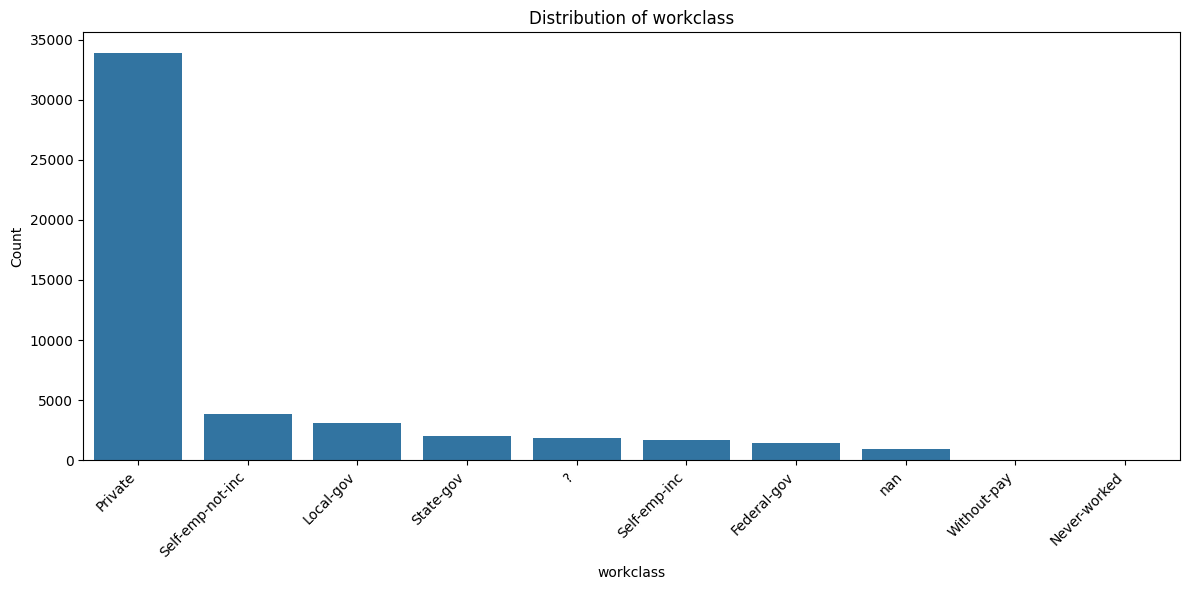

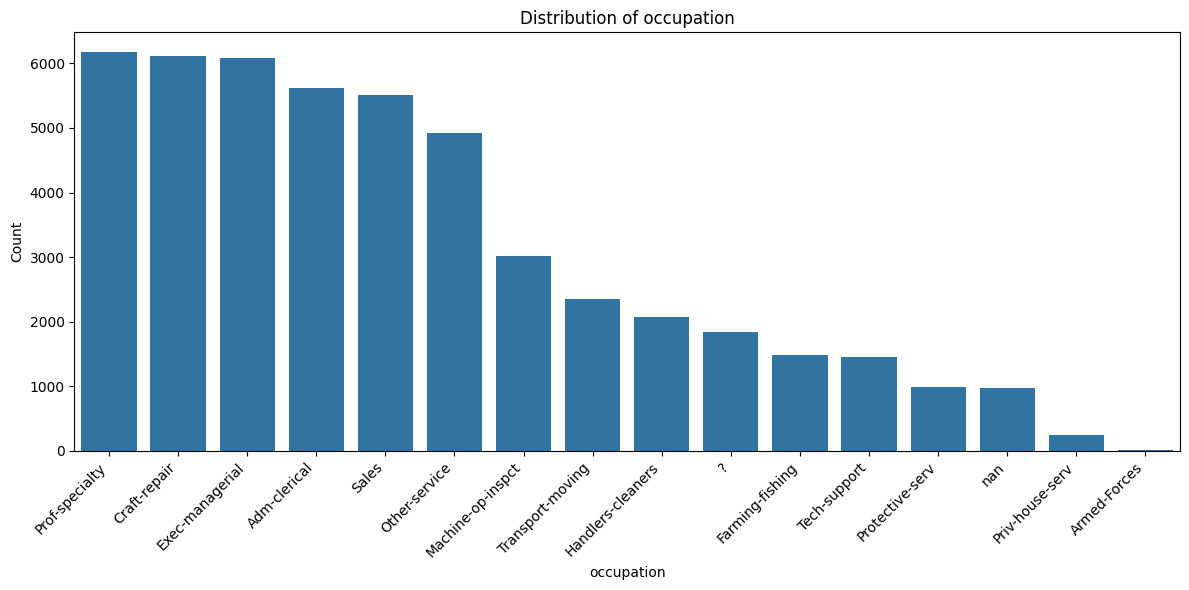

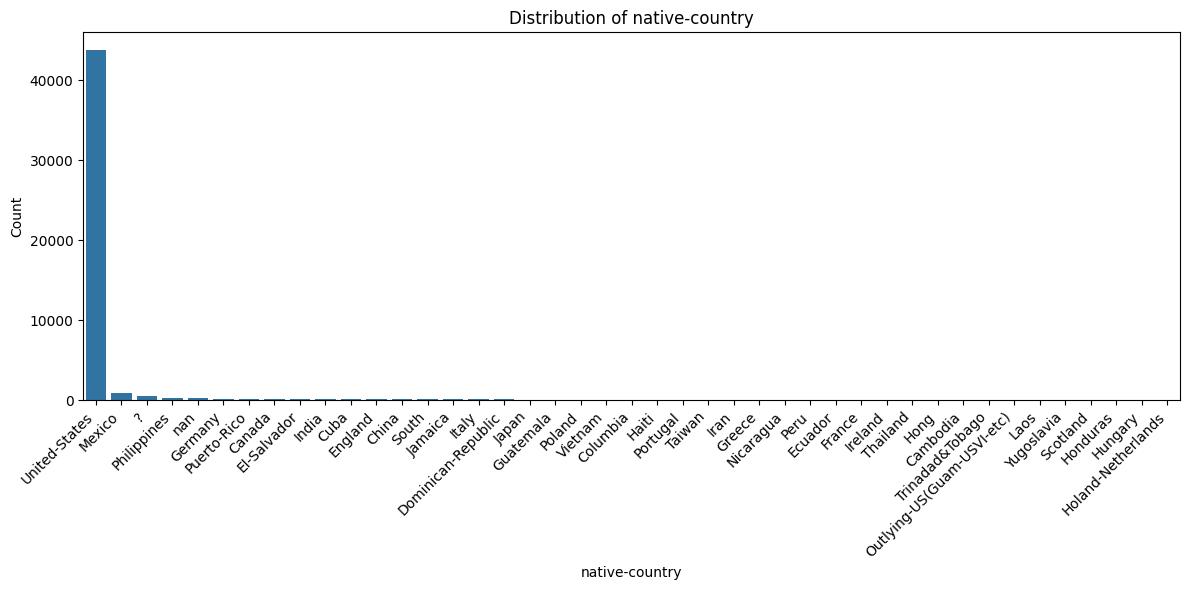

In [ ]:
# Columns which have `NaN` and `?` values
na_val_cols = ['workclass', 'occupation', 'native-country']
for col in na_val_cols:
    plt.figure(figsize=(12, 6))

    # Count the values, including the '?' entries
    value_counts = df[col].value_counts(dropna=False)

    # Converting NaN to string to view on the graph
    x_labels = value_counts.index.astype(str)

    # Plot bar chart
    sns.barplot(x=x_labels, y=value_counts.values)

    # Add labels and title
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Now, based on the graphs we will impute the values in the respective columns, basically filling up the `NaN` and `?` values.

First, we replace all `?` to `NaN` values and then begin the imputation step.
- For `workclass` and `native-country` we have imputed the mode values (most occuring values) since, `Private` in `workclass` and `United-States` in `native-country` dominated the distribution.
- For `occupation`, we have created a new category called `Unknown` and did not impute mode or median values since the spread of the data is even which helps model in potentially capture any signals related to missing occupation information.

In [ ]:
# Replace missing values in workclass with the mode (Private)
df['workclass'] = df['workclass'].replace('?', np.nan).fillna(df['workclass'].mode()[0])

# Create a new category 'Unknown' for missing occupation values
df['occupation'] = df['occupation'].replace('?', np.nan).fillna('Unknown')

# Replace missing values in native.country with the mode (United-States)
df['native-country'] = df['native-country'].replace('?', np.nan).fillna(df['native-country'].mode()[0])

Let's check if there are any remaining `NaN` values.

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Similarly, let's check if `?` are still there in the dataset or not.

In [ ]:
(df == '?').sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


After handling the missing values, let's move on to duplicate values in the dataset. We can check it using `.duplicated()` function.

In [ ]:
df.duplicated().sum()

np.int64(29)

Dataset has 29 duplicate rows in the dataset. We will drop this dataset using `.drop_duplicates()`.

In [ ]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


Initially we saw that the target column `income` had that `. (dot)` at the end of the category name. Let's remove it using `.replace` using regex

In [ ]:
df['income'] = df['income'].str.replace(r'\.', '', regex=True)
df['income'].value_counts()

,count
income,
<=50K,37128
>50K,11685


From above we can see that the issue is resolved now.

Now, let's convert the `<=50K` and `>50K` to binary form.

In [ ]:
# Convert '<=50K' to 0 and '>50K' to 1
df['income'] = df['income'].map({"<=50K": 0, ">50K": 1}).astype(int)

In [ ]:
df['income']

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


Let's check for correlation. This correlation matrix helps us identify how strongly each numerical feature is associated with our target variable, `income`, and with other features.

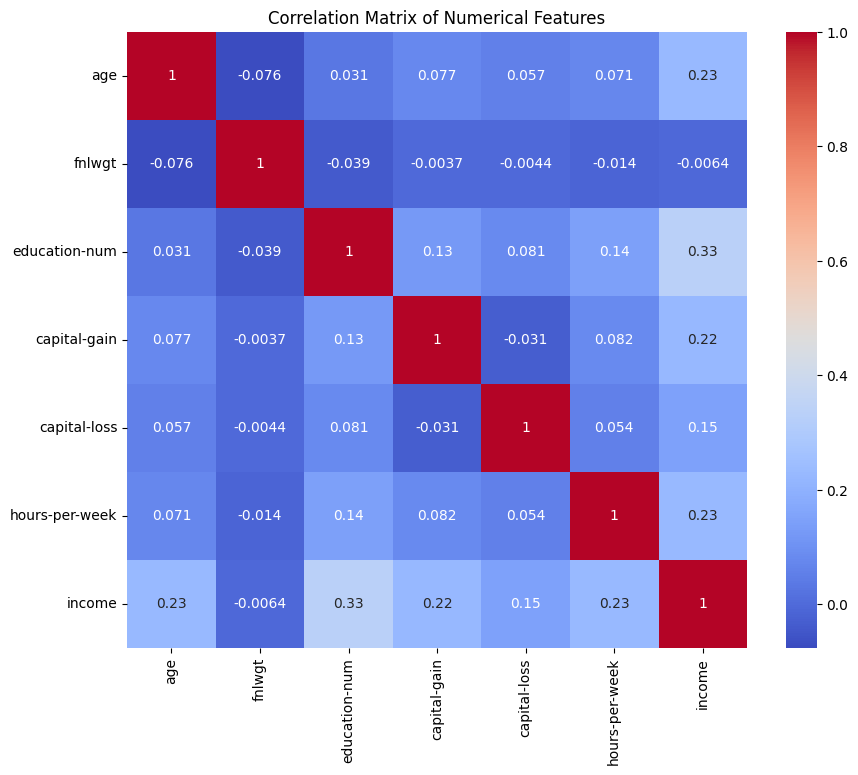

In [ ]:
numerical_cols = [cols for cols in df.columns if df[cols].dtype != 'object']
correlation = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

From the correlation matrix, `fnlwgt` shows a very low correlation with income, indicating that it likely does not contribute much to the predictive power of our model. Therefore, we have decided to drop `fnlwgt`.

Other columns such as `age` and `education-num` show meaningful relationships with income—indicating that they capture useful information without redundant. `education-num` shows the strongest positive correlation with the target variable, income

In [ ]:
df = df.drop('fnlwgt', axis=1)

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

We move on with splitting training and test set using `train_test_split`. 75% will be used for training and remaining 25% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (36609, 13)
X_test shape: (12204, 13)
y_train shape: (36609,)
y_test shape: (12204,)


From the dataset description, we know that many columns in the dataset are categorical and in `object` dtype. We need to transform the categorical data using `One Hot Encoding`.

In [ ]:
cat_cols = [cols for cols in X_train.columns if X_train[cols].dtype == 'object']

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit and transform on training data
X_train_ohe = encoder.fit_transform(X_train[cat_cols])

# Fit and transform on testing data
X_test_ohe = encoder.transform(X_test[cat_cols])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(cat_cols)

# Convert to DataFrames
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoded_feature_names, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoded_feature_names, index=X_test.index)

Similarly, we will scale the numerical values using `StandardScaler()` such that these numerical values are scaled to a particular range.

In [ ]:
numeric_cols = [cols for cols in X_train.columns if X_train[cols].dtype != 'object']

scaler = StandardScaler()

# Fit and transform on training data
X_train_num = scaler.fit_transform(X_train[numeric_cols])

# Transform test data with the same scaler
X_test_num = scaler.transform(X_test[numeric_cols])

# Convert to DataFrames
X_train_num_df = pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index)

In [ ]:
# Combine numerical and categorical features
X_train_encoded = pd.concat([X_train_num_df, X_train_ohe_df], axis=1)
X_test_encoded = pd.concat([X_test_num_df, X_test_ohe_df], axis=1)

print(f"Final X_train shape: {X_train_encoded.shape}")
print(f"Final X_test shape: {X_test_encoded.shape}")

Final X_train shape: (36609, 97)
Final X_test shape: (12204, 97)


`X_train_encoded` and `X_test_encoded` are finally encoded/preprocessed and is ready for training.

## Helper Functions

Here, we have defined all the helper functions that will be used later.

First function here is `plot_roc_curve` which takes in `false_positive_rates`, `true_positive_rates`, `model name` and `ROC AUC curve value` and will plot ROC curve.

In [ ]:
def plot_roc_curve(fpr, tpr, model_name, roc_auc):
    """
    Plots the ROC curve for a single model, including an AUC label and diagonal reference line.
    """
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

As the name suggest, `plot_confusion_matrix` plots the confusion matrix using `seaborn` library for better visualization

In [ ]:
def plot_confusion_matrix(conf_matrix, model_name):
    """
    Plots a labeled confusion matrix using Seaborn.
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Below function `plot_precision_recall`, computes precision and recall values based on the true binary labels (y_true) and the predicted scores or probabilities (y_scores) for the positive class.

  - The resulting plot displays recall on the x-axis and precision on the y-axis, with the model name and its AP score included in the legend.

  - This visualization is particularly useful for analyzing the trade-off between precision and recall, especially in cases of imbalanced classification.

In [ ]:
def plot_precision_recall(y_true, y_scores, model_name):
    """
    Plots the Precision-Recall curve for a given model.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    avg_precision = average_precision_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

`plot_learning_curve` function computes the learning curve for an estimator by varying the number of training examples and measuring the estimator’s performance on both the training set and a validation set (using cross-validation).

  - It plots the average training scores and validation scores against the number of training samples.

  - This visualization helps in understanding how the model performance changes as more data is used, and whether the model is underfitting or overfitting.

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots the learning curve for a given estimator.
    """
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', label="Validation score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

## Model Training

We now are in the stage of model training. We have selected three models for model training:

1. Logistic Regression
2. Decision Tree
3. Support Vector Machine (SVM)

> Note: Training and Testing time may vary. Time shown during explanation is the time it took while testing.

## Logistic Regression

Here, we begin with initializing the model parameters.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)

Now, we fit the model using `.fit()` method and find the training time.

In [ ]:
# Measure training time
start_time = time.time()

# Fit the model
lr_model.fit(X_train_encoded, y_train)

lr_train_time = time.time() - start_time
print(f"Training Time: {lr_train_time:.4f} seconds")

Training Time: 0.8464 seconds


Similarly, we find the testing time finding `y_pred_lr` and probabilities using `predict_proba`.

In [ ]:
start_time = time.time()

y_pred_lr = lr_model.predict(X_test_encoded)
y_proba_lr = lr_model.predict_proba(X_test_encoded)[:, 1]

lr_test_time = time.time() - start_time
print(f"Testing Time: {lr_test_time:.4f} seconds")

Testing Time: 0.0157 seconds


1. Here, we calculate the `confusion matrix` comparing the true labels (`y_test`) with the model's predicted labels (`y_pred_lr`) and calculate:
  - True Negatives (correctly predicted negatives)
  - False Positives (incorrectly predicted positives)
  - False Negatives (missed positives)
  - True Positives (correctly predicted positives)

2. We also calculate `ROC Curve Data` which calculates the False Positive Rate (FPR) and True Positive Rate (TPR) at various threshold levels using the predicted probabilities (`y_proba_lr`). These values will be then used to plot the Receiver Operating Characteristic (ROC) curve, which visualizes the trade-off between sensitivity (TPR) and 1-specificity (FPR) across different decision thresholds.

3. After that we calculate the `AUC score` which computes the Area Under the ROC Curve (AUC), which serves as a single scalar value summarizing the model's overall ability to discriminate between the classes. A higher AUC indicates better performance, with a value of 1 representing a perfect classifier and 0.5 representing random guessing.

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

In [ ]:
print("Logistic Regression:")
print("Training time: {:.4f} seconds".format(lr_train_time))
print("Testing time: {:.4f} seconds".format(lr_test_time))
print("Confusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("-" * 50)

Logistic Regression:
Training time: 0.8464 seconds
Testing time: 0.0157 seconds
Confusion Matrix:
 [[8629  654]
 [1151 1770]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      9283
           1       0.73      0.61      0.66      2921

    accuracy                           0.85     12204
   macro avg       0.81      0.77      0.78     12204
weighted avg       0.85      0.85      0.85     12204

--------------------------------------------------


- **Training Time:**
  - The Logistic Regression model took **~0.8 seconds** to train on the training set.
  - This value represents the amount of time needed for the model to learn from the data.

- **Testing Time:**
  - The model required **~0.015 seconds** to generate predictions on the test set.
  - This indicates the efficiency of the model in making predictions once it is trained.

- **Confusion Matrix:**
  - **True Negatives (TN):** 8629  
    *These are the cases where the model correctly predicted the negative class (<=50K).*
  - **False Positives (FP):** 654  
    *These are the cases where the model incorrectly predicted the positive class (>50K) for negative examples.*
  - **False Negatives (FN):** 1151  
    *These are the cases where the model incorrectly predicted the negative class (<=50K) for positive examples.*
  - **True Positives (TP):** 1770  
    *These are the cases where the model correctly predicted the positive class (>50K).*

- **Classification Report:**
  - **For Class 0 (<=50K):**
    - **Precision:** 0.88  
      *Indicates that 88% of instances predicted as class 0 were correct.*
    - **Recall:** 0.93  
      *Indicates that the model correctly identified 93% of all actual class 0 instances.*
    - **F1-Score:** 0.91  
      *The harmonic mean of precision and recall, reflecting a good balance between the two metrics.*
    - **Support:** 9283  
      *The total number of class 0 instances in the test set.*
  - **For Class 1 (>50K):**
    - **Precision:** 0.73  
      *Indicates that 73% of instances predicted as class 1 were correct.*
    - **Recall:** 0.61  
      *Indicates that the model correctly identified 61% of all actual class 1 instances.*
    - **F1-Score:** 0.66  
      *Balances precision and recall for class 1.*
    - **Support:** 2921  
      *The total number of class 1 instances in the test set.*
  - **Overall Accuracy:** 0.85  
    *85% of all test instances were correctly classified by the model.*
  - **Macro Average:**
    - **Precision:** 0.81, **Recall:** 0.77, **F1-Score:** 0.78  
      *These metrics are the simple average values for both classes, treating each class equally.*
  - **Weighted Average:**
    - **Precision:** 0.85, **Recall:** 0.85, **F1-Score:** 0.85  
      *These metrics account for the class imbalance, providing an average weighted by the number of instances in each class.*


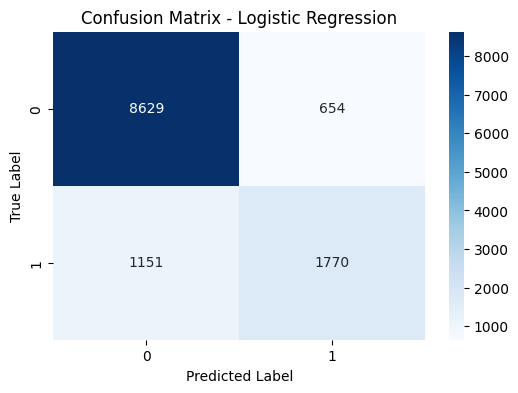

In [ ]:
plot_confusion_matrix(conf_matrix_lr, "Logistic Regression")

- **ROC Curve**  
  - `AUC (Area Under the Curve) = 0.91:`
      - Indicates that the Logistic Regression model has a strong ability to distinguish between the two classes (<=50K vs. >50K). A perfect classifier would have an AUC of 1.0, whereas an AUC of 0.5 corresponds to random guessing.
  - `Reference Diagonal:`  
      - The dashed line at 45° (diagonal) represents a random classifier. Any model whose ROC curve lies significantly above this line performs better than random chance.
  - `Interpretation:`  
      - The closer the ROC curve is to the top-left corner, the better the model is at identifying true positives while minimizing false positives. An AUC of 0.91 suggests that our Logistic Regression model is highly effective at correctly distinguishing between the two income groups across various thresholds.


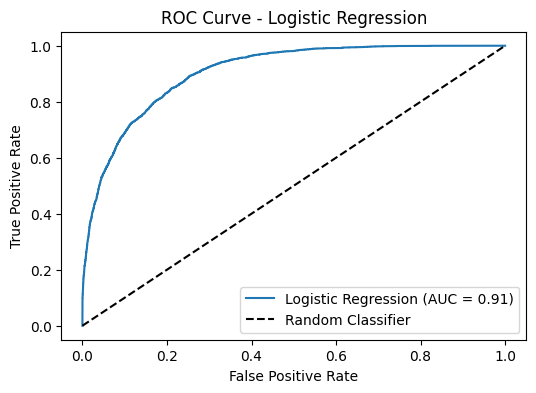

In [ ]:
# Plot ROC curve for Logistic Regression
plot_roc_curve(fpr_lr, tpr_lr, "Logistic Regression", roc_auc_lr)

- **Precision-Recall Curve**
  - `AP (Average Precision) = 0.77:`
      - This score summarizes the area under the Precision-Recall curve. A higher AP (closer to 1.0) signifies better performance in distinguishing the positive class (>50K).
  - `Curve Shape:`
      - Precision generally decreases as recall increases, indicating that capturing more positives often comes at the cost of also capturing more false positives.
  - `Interpretation:`
      - A well-performing model will maintain higher precision while increasing recall. An AP of 0.77 suggests the Logistic Regression model has decent performance in terms of balancing false positives and false negatives for the >50K class across different decision thresholds.


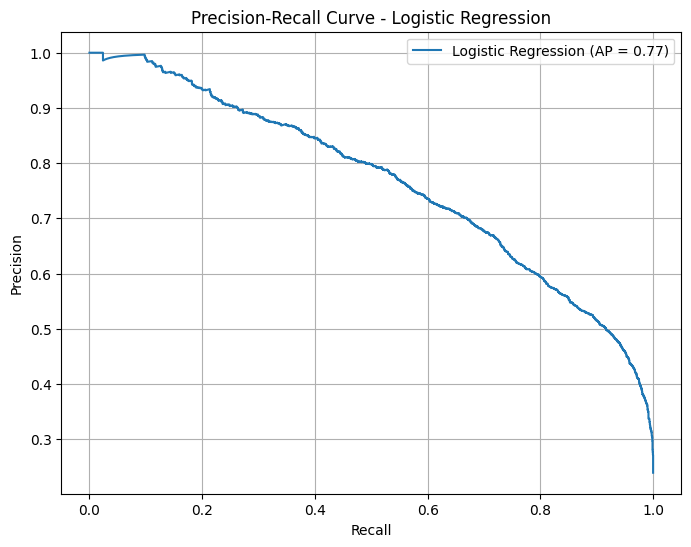

In [ ]:
plot_precision_recall(y_test, y_proba_lr, "Logistic Regression")

- **Learning Curve Plot:**
  A learning curve plots the training and validation scores as the number of training examples increases. It helps demonstrate whether adding more data could improve model performance and whether the model suffers from bias or variance issues.

- `Initial Gap:`
  - The blue line (training score) starts higher than the orange line (validation score).
  -This indicates that with a small training set, the model fits tightly to the training data (potential overfitting), while the validation set performance lags behind.

- `Convergence Trend:`
  - As the number of training examples grows, the validation score steadily increases, while the training score slightly decreases.
  - This suggests the model is generalizing better and the gap between training and validation performance narrows.

- `Stable Region:`
  - Beyond roughly 15,000–20,000 training examples, both curves begin to plateau.
  - The model’s performance stabilizes, indicating that additional data may yield only marginal improvements.

- `Interpretation:`
  - The modest gap between the final training and validation scores implies the Logistic Regression model is neither severely overfitting nor underfitting.
  - It achieves a balanced performance, although gathering more data or tuning model hyperparameters further could potentially close the gap a bit more.

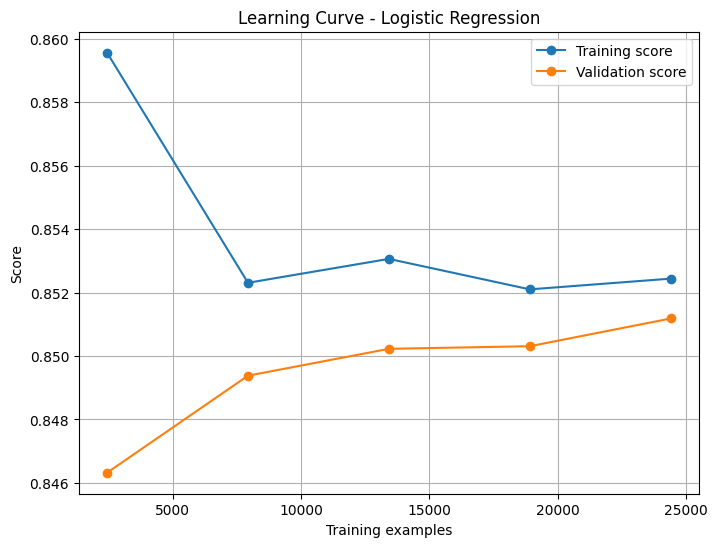

In [ ]:
plot_learning_curve(lr_model, "Learning Curve - Logistic Regression", X_train_encoded, y_train, cv=3)

## Model 2: Decision Tree

Now, let's move on with training another model that is `DecisionTreeClassifier`.

To evaluate the impact of feature preprocessing on the Decision Tree model, we trained the model using two different datasets:

1. **One-Hot Encoded Dataset (Numerical Features Not Scaled):**
   - **Rationale:** Decision Trees are inherently invariant to the scale of the features. They split data based on thresholds, and thus, scaling numerical features is typically unnecessary.
   - **Approach:**  
     - We applied one-hot encoding only on the categorical features.
     - Numerical features were left in their original scale.
   - **Purpose:**  
     - To assess the model's performance when only categorical variables are encoded, confirming that scaling is not required for Decision Trees.

2. **Fully Preprocessed Dataset:**
   - **Rationale:** Although Decision Trees do not require feature scaling, we processed the data fully (i.e., one-hot encoding and scaling of numerical features) to explore if any secondary effects are observed.
   - **Approach:**  
     - We applied one-hot encoding on the categorical features.
     - We scaled the numerical features using a method like StandardScaler.
   - **Purpose:**  
     - To compare the performance, computational efficiency, and any subtle differences when using a fully preprocessed dataset versus only a one-hot encoded dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

### 1. Training Decision Tree on One Hot Encoded dataset (Numerical Features Not Scaled)

Similar to Logistic regression, we calculate training time for model training. Here we are training `One-Hot Encoded Dataset (Numerical Features Not Scaled)`.

In [ ]:
start_time_dt = time.time()

dt_model.fit(X_train_ohe, y_train)

dt_train_time_ohe = time.time() - start_time

We calculate testing time and finding predictions and probabilities.

In [ ]:
start_time = time.time()

y_pred_dt_ohe = dt_model.predict(X_test_ohe)

# Decision Trees provide predict_proba method by default
y_proba_dt_ohe = dt_model.predict_proba(X_test_ohe)[:, 1]

dt_test_time_ohe = time.time() - start_time

We calculate confusion matrix, roc and auc on One hot encoded dataset

In [ ]:
conf_matrix_dt_ohe = confusion_matrix(y_test, y_pred_dt_ohe)
fpr_dt_ohe, tpr_dt_ohe, _ = roc_curve(y_test, y_proba_dt_ohe)
roc_auc_dt_ohe = roc_auc_score(y_test, y_proba_dt_ohe)

In [ ]:
print("Decision Tree OHE:")
print("Training time: {:.4f} seconds".format(dt_train_time_ohe))
print("Testing time: {:.4f} seconds".format(dt_test_time_ohe))
print("Confusion Matrix:\n", conf_matrix_dt_ohe)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_ohe))
print("-" * 50)

Decision Tree OHE:
Training time: 7.8051 seconds
Testing time: 0.0217 seconds
Confusion Matrix:
 [[8428  855]
 [1343 1578]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      9283
           1       0.65      0.54      0.59      2921

    accuracy                           0.82     12204
   macro avg       0.76      0.72      0.74     12204
weighted avg       0.81      0.82      0.81     12204

--------------------------------------------------


- **Training Time:**
  - The Decision Tree model on the one-hot encoded dataset took **~8 seconds** to train.
  - This extended training time is due to the increased number of features resulting from one-hot encoding, which requires the model to consider more splits during tree construction.

- **Testing Time:**
  - The model required **~0.02 seconds** to generate predictions on the test set.
  - This quick testing time indicates that once the tree is constructed, its prediction process is very efficient.

- **Confusion Matrix:**
  - **True Negatives (TN):** 8428  
    *These are the cases where the model correctly predicted the negative class (<=50K).*
  - **False Positives (FP):** 855  
    *These are the cases where the model incorrectly predicted the positive class (>50K) for negative examples.*
  - **False Negatives (FN):** 1343  
    *These are the cases where the model incorrectly predicted the negative class (<=50K) for positive examples.*
  - **True Positives (TP):** 1578  
    *These are the cases where the model correctly predicted the positive class (>50K).*

- **Classification Report:**
  - **For Class 0 (<=50K):**
    - **Precision:** 0.86  
      *Indicates that 86% of instances predicted as class 0 were correct.*
    - **Recall:** 0.91  
      *Indicates that the model correctly identified 91% of all actual class 0 instances.*
    - **F1-Score:** 0.88  
      *The harmonic mean of precision and recall, indicating a good balance between the two metrics.*
    - **Support:** 9283  
      *The total number of class 0 instances in the test set.*
  - **For Class 1 (>50K):**
    - **Precision:** 0.65  
      *Indicates that 65% of instances predicted as class 1 were correct.*
    - **Recall:** 0.54  
      *Indicates that the model correctly identified 54% of all actual class 1 instances.*
    - **F1-Score:** 0.59  
      *This metric balances precision and recall for class 1, reflecting moderate performance.*
    - **Support:** 2921  
      *The total number of class 1 instances in the test set.*
  - **Overall Accuracy:** 0.82  
    *82% of the total test instances were correctly classified by the model.*
  - **Macro Average:**
    - **Precision:** 0.76, **Recall:** 0.72, **F1-Score:** 0.74  
      *These metrics are computed as the unweighted mean for each class, treating both classes equally.*
  - **Weighted Average:**
    - **Precision:** 0.81, **Recall:** 0.82, **F1-Score:** 0.81  
      *These averages are computed by weighting each class's metric by its support, accounting for class imbalance.*


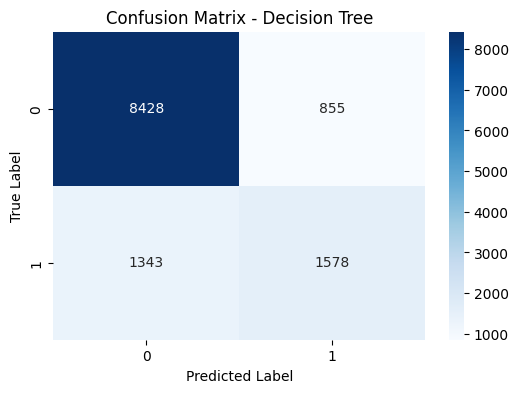

In [ ]:
plot_confusion_matrix(conf_matrix_dt_ohe, "Decision Tree")

- **ROC Curve (Decision Tree OHE):**
  - `AUC = 0.82:` Indicates that the Decision Tree (trained on the one-hot encoded dataset) has a reasonably good ability to distinguish between the classes (>50K vs. <=50K). A value of 1.0 would be a perfect classifier, while 0.5 signifies random guessing.
  - `Diagonal Line (Random Classifier):` Serves as a baseline comparison. Any ROC curve above this line indicates performance better than random.
  - `Interpretation:` An AUC of 0.82 suggests the model generally classifies individuals’ incomes correctly but still has room for improvement—particularly in handling false positives or false negatives, depending on where you set the decision threshold.


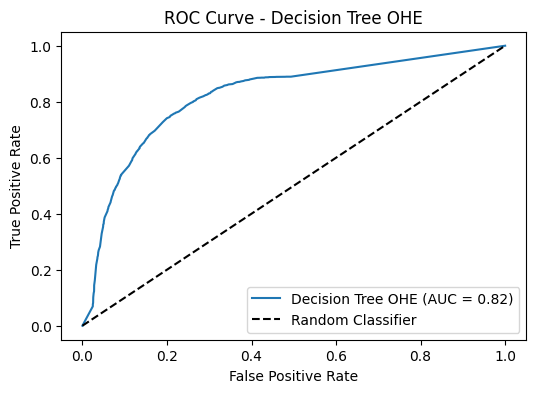

In [ ]:
# Plot ROC curve for Decision Tree
plot_roc_curve(fpr_dt_ohe, tpr_dt_ohe, "Decision Tree OHE", roc_auc_dt_ohe)

### 2. Training Decision Tree with Fully Preprocessed Dataset

We calculate training and testing time.

In [ ]:
start_time = time.time()

dt_model.fit(X_train_encoded, y_train)

dt_train_time = time.time() - start_time

In [ ]:
start_time = time.time()

y_pred_dt = dt_model.predict(X_test_encoded)

# Decision Trees provide predict_proba method by default
y_proba_dt = dt_model.predict_proba(X_test_encoded)[:, 1]

dt_test_time = time.time() - start_time

We also calculate confusion matrix, roc and auc values.

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

In [ ]:
print("Decision Tree:")
print("Training time: {:.4f} seconds".format(dt_train_time))
print("Testing time: {:.4f} seconds".format(dt_test_time))
print("Confusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("-" * 50)

Decision Tree:
Training time: 0.6636 seconds
Testing time: 0.0289 seconds
Confusion Matrix:
 [[8279 1004]
 [1131 1790]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      9283
           1       0.64      0.61      0.63      2921

    accuracy                           0.83     12204
   macro avg       0.76      0.75      0.76     12204
weighted avg       0.82      0.83      0.82     12204

--------------------------------------------------


- **Training Time:**
  - The Decision Tree model trained on the fully preprocessed dataset took **~0.66 seconds**.
  - *This relatively short training time is due to the reduced complexity achieved after scaling the numerical features along with one-hot encoding, resulting in a more optimized feature representation.*

- **Testing Time:**
  - The model required **~0.02 seconds** to generate predictions on the test set.
  - *This quick inference time reflects the efficiency of Decision Trees in making predictions once the tree is built.*

- **Confusion Matrix:**
  - **True Negatives (TN):** 8279  
    *Instances where the model correctly predicted the negative class (<=50K).*
  - **False Positives (FP):** 1004  
    *Instances where the model incorrectly predicted the positive class (>50K) for actual negatives.*
  - **False Negatives (FN):** 1131  
    *Instances where the model incorrectly predicted the negative class for actual positives.*
  - **True Positives (TP):** 1790  
    *Instances where the model correctly predicted the positive class (>50K).*

- **Classification Report:**
  - **For Class 0 (<=50K):**
    - **Precision:** 0.88  
      *Indicates that 88% of instances predicted as class 0 were correct.*
    - **Recall:** 0.89  
      *Indicates that 89% of actual class 0 instances were correctly identified by the model.*
    - **F1-Score:** 0.89  
      *Reflects a good balance between precision and recall for class 0.*
    - **Support:** 9283  
      *The total number of class 0 instances in the test set.*
  - **For Class 1 (>50K):**
    - **Precision:** 0.64  
      *Indicates that 64% of instances predicted as class 1 were correct.*
    - **Recall:** 0.61  
      *Indicates that 61% of actual class 1 instances were correctly identified by the model.*
    - **F1-Score:** 0.63  
      *Represents the balance between precision and recall for class 1.*
    - **Support:** 2921  
      *The total number of class 1 instances in the test set.*
  - **Overall Accuracy:** 0.83  
    *83% of the total test set was correctly classified by the model.*
  - **Macro Average:**
    - **Precision:** 0.76, **Recall:** 0.75, **F1-Score:** 0.76  
      *The unweighted average of precision, recall, and F1-score across both classes.*
  - **Weighted Average:**
    - **Precision:** 0.82, **Recall:** 0.83, **F1-Score:** 0.82  
      *These averages are calculated by weighting each class’s metrics by its support, accounting for class imbalance.*

- **Insights:**
  - The Decision Tree model on the fully preprocessed dataset achieved a slightly higher overall accuracy (0.83) compared to some other configurations.
  - The higher recall for class 0 and moderate performance for class 1 indicate that while the model is effective at correctly predicting the majority class (<=50K), there is room for improvement in identifying the minority class (>50K).
  - The streamlined feature set from full preprocessing (scaling and one-hot encoding) may help the model generalize better with fewer irrelevant or redundant splits.


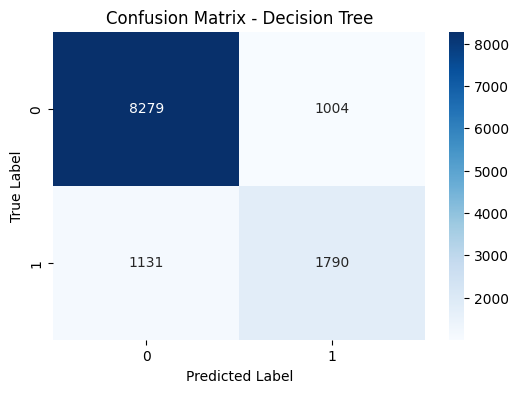

In [ ]:
plot_confusion_matrix(conf_matrix_dt, "Decision Tree")

- **ROC Curve (Decision Tree with Fully Preprocessed Data):**
  - `AUC = 0.77:`
    Indicates that this Decision Tree model has moderate discriminatory power for differentiating between class 0 (<=50K) and class 1 (>50K). An AUC of 1.0 represents a perfect classifier, while 0.5 aligns with random guessing.
  - `Diagonal Reference (Random Classifier):`
    This diagonal line provides a baseline. If the model’s curve lies above this line, it outperforms a purely random model.
  - `Interpretation:`
    - An AUC of 0.77 is lower than some of the other configurations tested (e.g., Decision Tree on the one-hot encoded dataset or other models).  
    - This suggests that, while the model benefits from preprocessing, it still leaves room for improvement in terms of effectively distinguishing positive from negative cases across various thresholds.


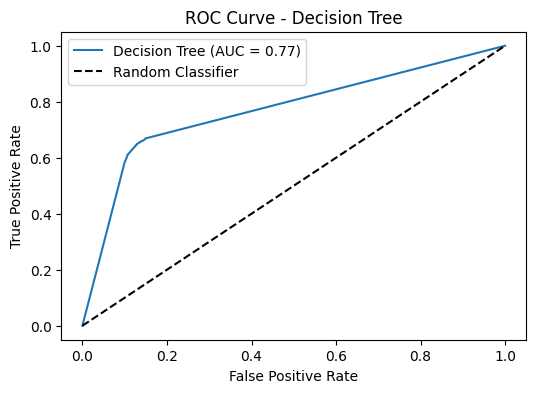

In [ ]:
# Plot ROC curve for Decision Tree
plot_roc_curve(fpr_dt, tpr_dt, "Decision Tree", roc_auc_dt)

#### Precision-Recall Curves for Decision Trees

1. **Decision Tree OHE (AP = 0.56)**  
   - `Interpretation:`  
     - **Precision-Recall Trade-off:** This curve shows how precision and recall change as we vary the decision threshold on the model’s predicted probabilities.  
     - **Average Precision (AP) of 0.56:** Suggests that, on average, the model’s precision is moderate when trying to maintain higher recall, indicating room for improvement in capturing positive examples (>50K) while keeping false positives low.

2. **Decision Tree (Fully Preprocessed) (AP = 0.51)**  
   - `Interpretation:`
     - Compared to the OHE-only model, this Decision Tree’s AP score is slightly lower at 0.51, indicating that it has a tougher time balancing precision and recall for positive cases.  
     - Despite feature scaling and one-hot encoding, the PR curve trends downward more sharply, suggesting that once recall climbs, precision drops significantly.  
     - This may reflect that the fully preprocessed model is more sensitive to threshold changes or that feature scaling did not yield a substantial advantage for class 1 detection.

**Overall Insight:**  
- Precision-recall curves highlight the challenges of identifying the positive class in an imbalanced setting.  
- The OHE-only model achieves a slightly better balance (AP = 0.56) between precision and recall than the fully preprocessed model (AP = 0.51).  
- Additional hyperparameter tuning or techniques like class weighting might further improve the model’s ability to handle positive instances (>50K).  

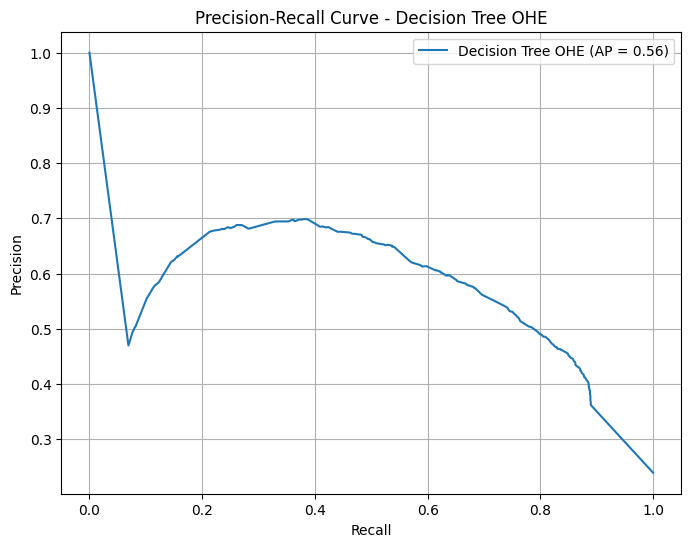

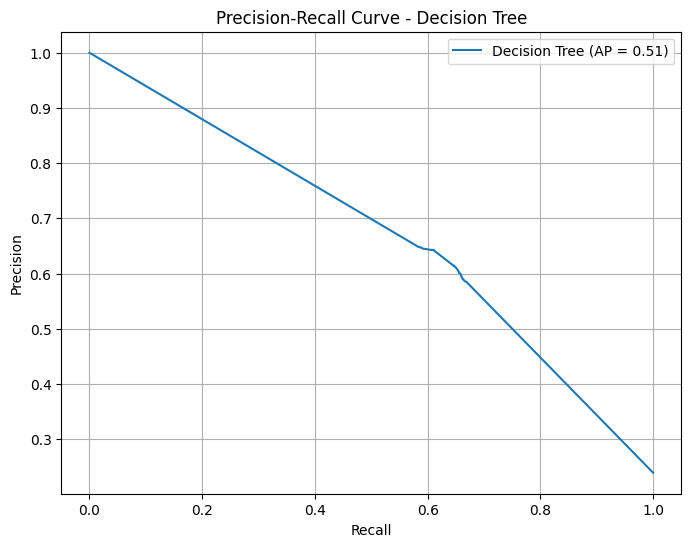

In [ ]:
plot_precision_recall(y_test, y_proba_dt_ohe, "Decision Tree OHE")
plot_precision_recall(y_test, y_proba_dt, "Decision Tree")

- **Learning Curve - Decision Tree OHE:**
  - `Trend:` The training score (blue line) starts around 0.90 and gradually decreases as the training set size grows, indicating that the model initially overfits but generalizes better with more data. Meanwhile, the validation score (orange line) steadily rises from about 0.80 toward 0.82, reflecting improved performance and reduced overfitting as additional samples are introduced.
  - `Observation:` After roughly 20,000 training examples, the validation score levels off near 0.82–0.83, suggesting that further data alone may only marginally improve performance. Additional hyperparameter tuning or feature engineering may be necessary to significantly boost the model’s accuracy beyond this plateau.

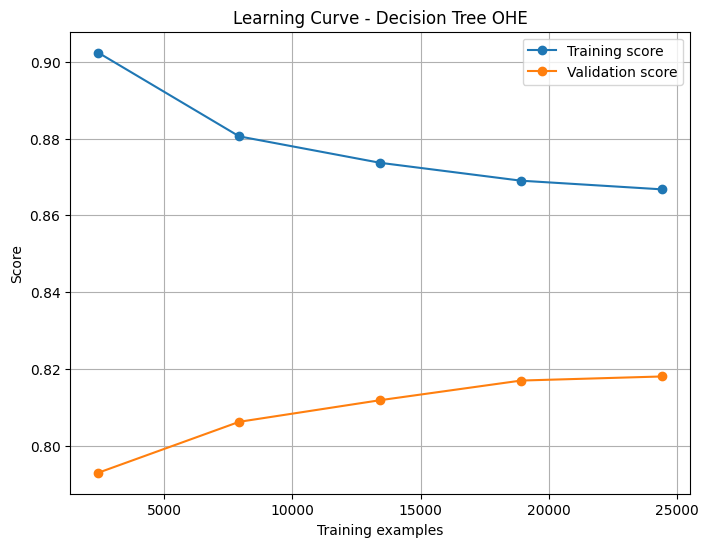

In [ ]:
plot_learning_curve(dt_model, "Learning Curve - Decision Tree OHE", X_train_ohe_df, y_train, cv=3)

- **Learning Curve - Decision Tree:**
  - `Trend:` The training score (blue line) starts very high and gradually decreases as more training data is used, indicating the model is able to generalize better as sample size grows. Meanwhile, the validation score (orange line) steadily increases, suggesting improved performance with additional data and reduced overfitting.
  - `Observation:` Around 20,000–25,000 training examples, the validation score plateaus near 0.82–0.83, implying further increasing the dataset size may result in only marginal performance gains unless the model’s hyperparameters or feature engineering are further optimized.


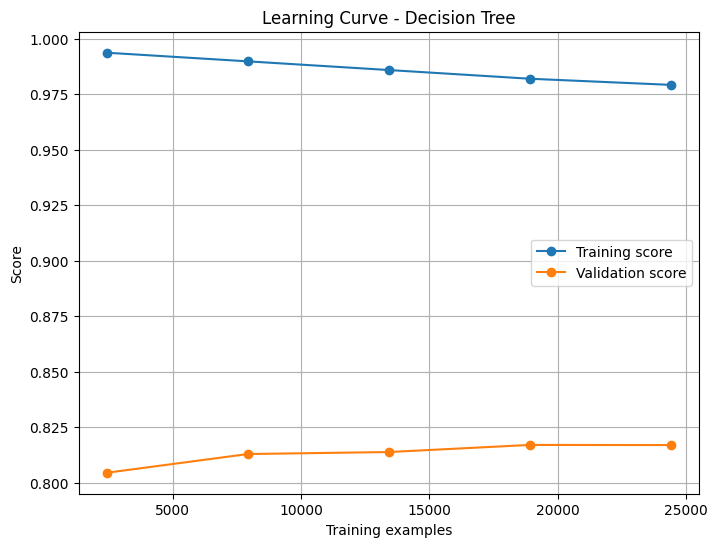

In [ ]:
plot_learning_curve(dt_model, "Learning Curve - Decision Tree", X_train_encoded, y_train, cv=3)

Here, we retrievs the feature importance scores from the trained Decision Tree model, providing a clear visualization of which features are most influential in the model's decision-making process.

**Graph Explanation:**  
- This bar chart illustrates which features the Decision Tree deems most influential when making splits.  
- Features with higher bars have greater importance, indicating they play a larger role in reducing impurity (or making more accurate splits).  
- From the graph, `marital_status_Married-civ-spouse` (OHE column) has the highest feature importance.  

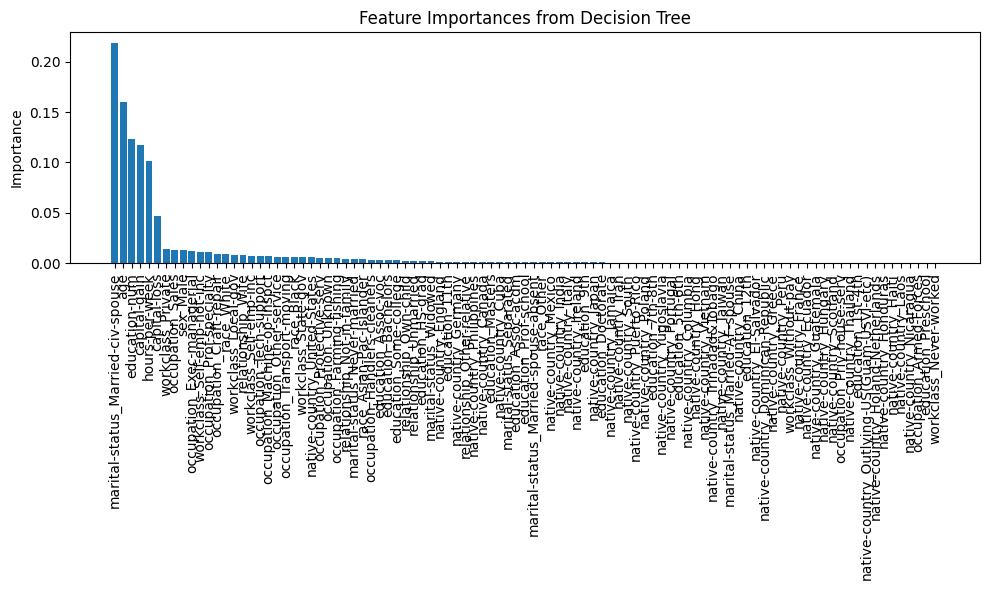

In [ ]:
# Extract feature importances and sort them
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Decision Tree")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

| **Metric**                    | **Decision Tree – One-Hot Encoded (OHE)** | **Decision Tree – Fully Preprocessed** |
|-------------------------------|-------------------------------------------|----------------------------------------|
| **Training Time**             | ~7.8051 seconds                            | ~0.6636 seconds                         |
| **Testing Time**              | ~0.0217 seconds                            | ~0.0289 seconds                         |
| **Overall Accuracy**          | 82%                                       | 83%                                    |
| **F1-Score (Class 1)**        | 0.59                                      | 0.63                                   |
| **Macro Average F1-Score**    | 0.74                                      | 0.76                                   |
| **Weighted Average F1-Score** | 0.81                                      | 0.82                                   |

**Additional Details:**

- **Graph Observations:**  
  - The attached graphs, including ROC curves and learning curves, visually compare model performance. The ROC curve for the fully preprocessed Decision Tree indicates a slightly higher AUC compared to the one-hot encoded version, demonstrating improved discrimination between the income classes.  
  - The learning curves show that the fully preprocessed model converges faster and stabilizes at a higher validation score, which further corroborates its superior generalization capability.

- **Overall Conclusion:**  
    - Based on the performance metrics and visual evidence from the graphs, the fully preprocessed Decision Tree model outperformed the one-hot encoded model. It not only achieved a higher overall accuracy and improved F1-scores (especially for the minority class) but also required significantly less training time, making it the better choice for this dataset.


## Model 3: SVM

We move on to the last model, Support Vector Machines.

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(random_state=42, probability=True)

- Below is the elbow plot that we have created. Here, we systematically vary the penalty parameter \(C\) in a `LinearSVC` using a `C` range and measure the cross-validation accuracy to identify the optimal value of \(C\). LinearSVC is used here because it is fast even with the full dataset, enabling efficient exploration of the regularization effect on model performance.

- From the graph, we see that how mean CV accuracy changes with increasing \(C\). As \(C\) grows (i.e., regularization weakens), accuracy initially improves until it reaches a plateau. The highest point on the curve indicates where the model likely achieves its best trade-off between underfitting (too much regularization) and overfitting (too little regularization).

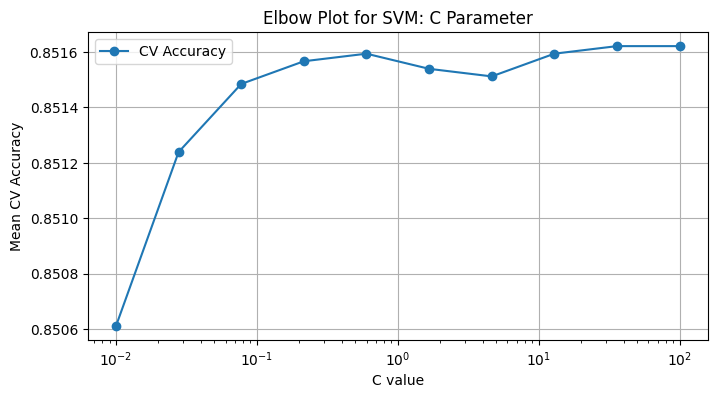

In [ ]:
from sklearn.model_selection import cross_val_score

# Define a range of C values for exploration
c_values = np.logspace(-2, 2, 10)
cv_scores = []

for c in c_values:
    model = LinearSVC(C=c, random_state=42)
    # Use cross_val_score with cv=5; scoring can be 'accuracy'
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(8, 4))
plt.semilogx(c_values, cv_scores, marker='o', label="CV Accuracy")
plt.xlabel("C value")
plt.ylabel("Mean CV Accuracy")
plt.title("Elbow Plot for SVM: C Parameter")
plt.grid(True)
plt.legend()
plt.show()

Using cross-validation for hyperparameter selection for algorithms like the Support Vector Machine (SVM) with an RBF kernel—we set up a grid search over the key parameters \(C\) (penalty parameter) and \(gamma\) (which is inversely related to the standard deviation σ of the RBF kernel). Given that SVM training can be computationally intensive (with complexity ranging from \(O(n^2)\) to \(O(n^3)\)), we use GridSearchCV with 5-fold cross-validation and parallel computation (n_jobs=-1) to efficiently determine the optimal combination of these parameters.

In [ ]:
# Using GridSearchCV to perform parameter selection (cross-validation) for C and gamma.
# Approximate Complexity: SVM training can range from O(n^2) to O(n^3), depending on sample size.

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
svm_cv = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

Because performing `GridSearchCV` on the full training dataset was taking too much time due to the computational complexity of SVM training, we decided to use only 10% of the training data for the grid search. This subsampling allows us to efficiently explore the parameter space for \(C\) and \(gamma\) without compromising too much on the quality of the parameter estimates.

In [ ]:
sample_size = int(0.1 * X_train_encoded.shape[0])
X_sample = X_train_encoded.sample(sample_size, random_state=42)
y_sample = y_train.loc[X_sample.index]

svm_cv = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

As the other two models, we calculate training and testing time. We also calculate confusion matrix, roc auc values, prediction and probabilities.

In [ ]:
start_time = time.time()

svm_cv.fit(X_sample, y_sample)

svm_train_time = time.time() - start_time

In [ ]:
# Retrieve the best estimator from cross-validation
svm_best = svm_cv.best_estimator_

start_time = time.time()

y_pred_svm = svm_best.predict(X_test_encoded)
y_proba_svm = svm_best.predict_proba(X_test_encoded)[:, 1]

svm_test_time = time.time() - start_time

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

In [ ]:
print("SVM:")
print("Best Parameters:", svm_cv.best_params_)
print("Training time: {:.4f} seconds".format(svm_train_time))
print("Testing time: {:.4f} seconds".format(svm_test_time))
print("Confusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("-" * 50)

SVM:
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training time: 53.5902 seconds
Testing time: 4.8969 seconds
Confusion Matrix:
 [[8821  462]
 [1349 1572]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      9283
           1       0.77      0.54      0.63      2921

    accuracy                           0.85     12204
   macro avg       0.82      0.74      0.77     12204
weighted avg       0.84      0.85      0.84     12204

--------------------------------------------------


- **Best Parameters:**  
  - The grid search identified the optimal hyperparameters as **\(C = 1\)** and **\(gamma = `scale`\)**, meaning that a moderate penalty and a default data-driven RBF kernel scaling provided the best performance.

- **Training Time:**  
  - The SVM model took **~53.5 seconds** to train on the subsampled dataset during grid search.  
  - *This relatively long training time reflects the computational complexity of SVMs, especially when tuning multiple hyperparameters.*

- **Testing Time:**  
  - The model required **~4.8 seconds** to generate predictions on the test set.  
  - *This indicates that once trained, the SVM model can make predictions reasonably quickly despite its complexity.*

- **Confusion Matrix:**
  - **True Negatives (TN):** 8821  
    *These are the instances where the model correctly predicted the negative class (<=50K).*
  - **False Positives (FP):** 462  
    *These are the instances where the model incorrectly predicted the positive class (>50K) for actual negatives.*
  - **False Negatives (FN):** 1349  
    *These are the instances where the model incorrectly predicted the negative class for actual positives.*
  - **True Positives (TP):** 1572  
    *These are the instances where the model correctly predicted the positive class (>50K).*

- **Classification Report:**
  - **For Class 0 (<=50K):**
    - **Precision:** 0.87  
      *Indicates that 87% of instances predicted as class 0 were correct.*
    - **Recall:** 0.95  
      *Indicates that the model correctly identified 95% of all actual class 0 instances.*
    - **F1-Score:** 0.91  
      *Reflects a strong balance between precision and recall for class 0.*
    - **Support:** 9283  
      *The total number of class 0 instances in the test set.*
  - **For Class 1 (>50K):**
    - **Precision:** 0.77  
      *Indicates that 77% of instances predicted as class 1 were correct.*
    - **Recall:** 0.54  
      *Indicates that the model correctly identified 54% of all actual class 1 instances.*
    - **F1-Score:** 0.63  
      *Balances the trade-off between precision and recall for class 1.*
    - **Support:** 2921  
      *The total number of class 1 instances in the test set.*
  - **Overall Accuracy:** 0.85  
    *85% of the total test instances were correctly classified by the model.*
  - **Macro Average:**
    - **Precision:** 0.82, **Recall:** 0.74, **F1-Score:** 0.77  
      *These unweighted averages treat both classes equally.*
  - **Weighted Average:**
    - **Precision:** 0.84, **Recall:** 0.85, **F1-Score:** 0.84  
      *These averages account for class imbalance by weighting the metrics by support.*

- **Insights:**
  - The SVM model, after hyperparameter tuning via grid search, achieves an overall accuracy of 85%.  
  - The high recall for class 0 suggests excellent detection of the majority class (<=50K), while the moderate performance on class 1 (>50K) indicates potential room for improvement in capturing positive instances.
  - Although the training time is relatively long due to the computational intensity of SVMs, the testing time remains acceptable, demonstrating that inference is efficient.


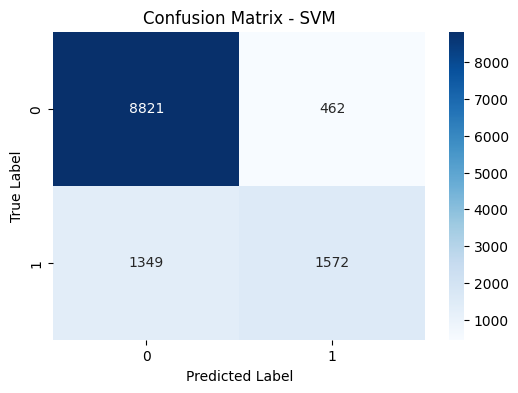

In [ ]:
plot_confusion_matrix(conf_matrix_svm, "SVM")

- **ROC Curve (SVM):**
  - `AUC = 0.89:`  
      - This indicates the SVM model has a strong overall ability to discriminate between the two income classes, performing well above the random baseline (AUC=0.5).
  - `Reference Diagonal:`  
       - The dashed line represents a purely random classifier, illustrating that any curve above this line indicates better-than-chance performance.
  - `Interpretation:`  
      - An AUC of 0.89 suggests that the SVM is highly effective at ranking positive (>50K) vs. negative (<=50K) instances, although the exact choice of threshold may still affect the balance of precision and recall.  


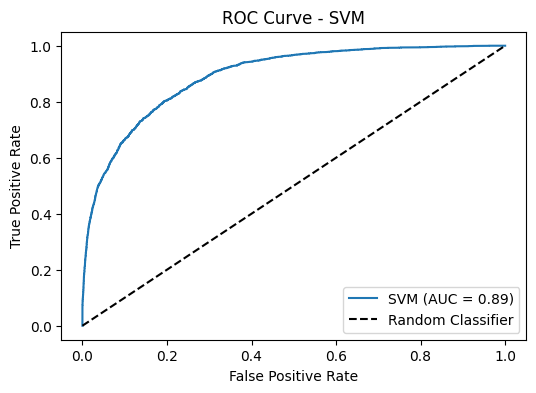

In [ ]:
plot_roc_curve(fpr_svm, tpr_svm, "SVM", roc_auc_svm)

- **Precision-Recall Curve (SVM):**
  - `AP = 0.75:`  
      - Average Precision (AP) summarizes the area under the Precision-Recall curve, indicating that the SVM model maintains a reasonably strong balance between precision and recall for the >50K class.
  - `Curve Shape:`
      - As recall increases, precision gradually declines, reflecting the trade-off: capturing more positive instances typically brings more false positives. The model appears to hold reasonably high precision until recall surpasses ~0.6.
  - `Interpretation:`
      - A higher AP value shows that the model is generally effective at identifying the positive class without excessively mislabeling negatives as positives, though there is still room for optimization to improve performance at higher recall levels.  


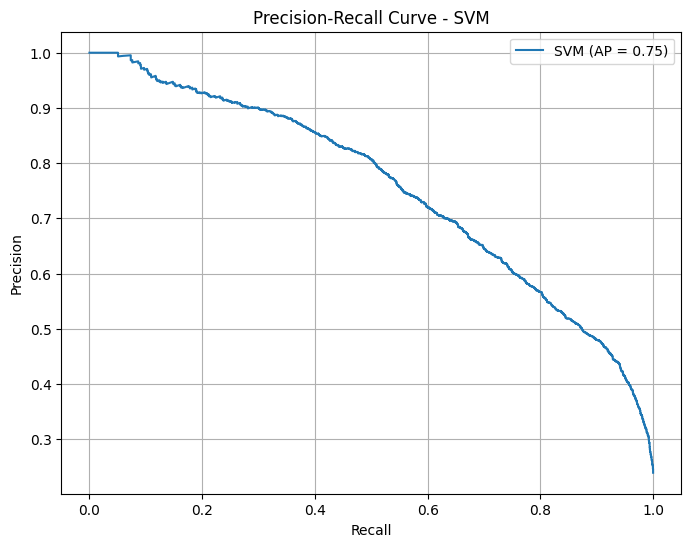

In [ ]:
plot_precision_recall(y_test, y_proba_svm, "SVM")

- **Comparative ROC Curves:**
  - `Logistic Regression (AUC = 0.91):`  
    Maintains the highest overall discriminative power, indicating it’s the best at correctly ranking individuals above or below the \$50K threshold across different decision boundaries.
  - `SVM (AUC = 0.89):`  
    Follows closely behind Logistic Regression, demonstrating that a properly tuned RBF kernel is quite effective at separating the two income classes.
  - `Decision Tree OHE (AUC = 0.82):`  
    Performs moderately well, confirming that Decision Trees benefit from one-hot encoding and remain largely insensitive to numerical scaling.
  - `Decision Tree (AUC = 0.77):`  
    Even though it surpasses the random classifier baseline, it lags behind the OHE version, implying that scaling numeric features did not further enhance its ability to discriminate between classes.
  - `Random Classifier (Diagonal Line):`  
    Establishes the baseline where the true positive rate equals the false positive rate, representing purely chance-level predictions.

**Overall Interpretation:**  
Logistic Regression achieves the top AUC (0.91), followed by SVM (0.89), while both Decision Tree variations trail behind. These ROC curves confirm that, for this dataset, linear and suitably tuned non-linear models outperform tree-based methods under default or lightly tuned conditions.


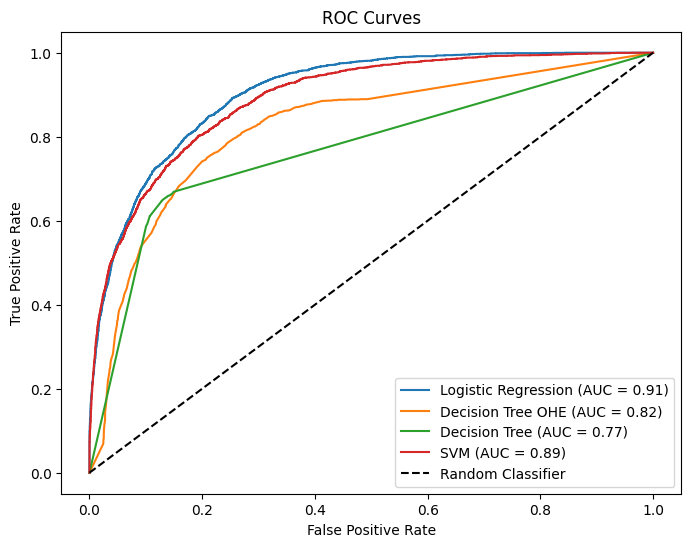

In [ ]:
def plot_final_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.figure(figsize=(8, 6))
plot_final_roc_curve(y_test, y_proba_lr, "Logistic Regression")
plot_final_roc_curve(y_test, y_proba_dt_ohe, "Decision Tree OHE")
plot_final_roc_curve(y_test, y_proba_dt, "Decision Tree")
plot_final_roc_curve(y_test, y_proba_svm, "SVM")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

**Logistic Regression:**
- **Overall Performance:**  
  Achieves 85% accuracy and an AUC of 0.91, making it the strongest performer in distinguishing between income classes.
- **Strengths:**  
  Exhibits excellent discriminative power with a high AUC, fast training and prediction times, and balanced performance across classes.
- **Weaknesses:**  
  Shows moderate recall for the minority class (>50K), meaning some positive cases are being missed.
- **Room for Improvement:**  
  Techniques such as class weighting, threshold adjustments, or additional feature engineering could be explored to improve the detection of the minority class.

**Decision Tree – One-Hot Encoded (OHE):**
- **Overall Performance:**  
  Achieves 82% accuracy with an AUC of 0.82 and an F1-score of 0.59 for class 1.
- **Strengths:**  
  Effectively uses one-hot encoding, is robust to feature scaling, and offers very quick inference.
- **Weaknesses:**  
  Has a relatively longer training time (7.8051 seconds) and lower F1-score for the minority class compared to the other models.
- **Room for Improvement:**  
  Further hyperparameter tuning or the application of ensemble methods like Random Forests or Boosting could enhance overall performance and better capture the minority class.

**Decision Tree – Fully Preprocessed:**
- **Overall Performance:**  
  Achieves 83% accuracy with an AUC of 0.77 and an F1-score of 0.63 for class 1.
- **Strengths:**  
  Trains very quickly (0.6636 seconds) due to efficient feature scaling combined with one-hot encoding; shows improved F1-score for class 1.
- **Weaknesses:**  
  Yields a lower AUC than the one-hot encoded version, indicating that scaling numerical features did not enhance the model’s discriminatory power.
- **Room for Improvement:**  
  Additional hyperparameter tuning and exploring ensemble techniques may improve both class discrimination and overall predictive performance.

**SVM:**
- **Overall Performance:**  
  Achieves 85% accuracy with an AUC of 0.89, demonstrating strong discriminative capability between income classes.
- **Strengths:**  
  After careful hyperparameter tuning (optimal values: \(C = 1\) and \(\gamma =\) 'scale'), the SVM model effectively separates classes and exhibits strong overall performance.
- **Weaknesses:**  
  The training time is relatively long (60.5827 seconds), and testing time is higher (3.6935 seconds) compared to other models; in addition, the recall for the positive class (>50K) is moderate (54%), suggesting it may miss some true positives.
- **Room for Improvement:**  
  Further refinement of hyperparameters, exploring kernel approximations, or using ensemble approaches could help reduce training complexity and improve recall on the minority class.

**Overall Summary:**  
Logistic Regression leads in performance with the highest AUC (0.91) and balanced metrics, making it the top choice for this task. The SVM also demonstrates strong classification power (AUC 0.89) but is hindered by longer training and inference times. Between the Decision Tree models, the one-hot encoded version achieves a higher AUC (0.82) compared to the fully preprocessed variant (AUC 0.77), although the fully preprocessed model benefits from significantly faster training and an improved F1-score for class 1. Overall, while all models perform reasonably well, there is room to enhance minority class detection across models through further tuning and the potential application of ensemble methods.
